In [1]:
import pandas as pd

df = pd.read_csv('C:/Users/ASUS/Downloads/TUGASKU/Dicoding/Lintasarta/Project2-MembuatModelMachineLearningdenganDataTimeSeries/Gold Price (2013-2023).csv')
df

,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%
...,...,...,...,...,...,...,...
2578,01/08/2013,"1,663.20","1,651.50","1,662.60","1,648.80",0.13K,0.97%
2579,01/07/2013,"1,647.20","1,657.30","1,663.80","1,645.30",0.09K,-0.16%
2580,01/04/2013,"1,649.90","1,664.40","1,664.40","1,630.00",0.31K,-1.53%
2581,01/03/2013,"1,675.60","1,688.00","1,689.30","1,664.30",0.19K,-0.85%


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583 entries, 0 to 2582
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2583 non-null   object
 1   Price     2583 non-null   object
 2   Open      2583 non-null   object
 3   High      2583 non-null   object
 4   Low       2583 non-null   object
 5   Vol.      2578 non-null   object
 6   Change %  2583 non-null   object
dtypes: object(7)
memory usage: 141.4+ KB


In [3]:
df.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        5
Change %    0
dtype: int64

In [4]:
df['date']=pd.to_datetime(df['Date'])
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,date
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%,2022-12-30
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%,2022-12-29
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%,2022-12-28
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%,2022-12-27
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%,2022-12-26


In [5]:
df.dtypes

Date                object
Price               object
Open                object
High                object
Low                 object
Vol.                object
Change %            object
date        datetime64[ns]
dtype: object

In [6]:
new_df = df.drop('Date', axis = 1)
new_df.set_index('date', inplace = True)
new_df

,Price,Open,High,Low,Vol.,Change %
date,,,,,,
2022-12-30,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
2022-12-29,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2022-12-28,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
2022-12-27,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
2022-12-26,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%
...,...,...,...,...,...,...
2013-01-08,"1,663.20","1,651.50","1,662.60","1,648.80",0.13K,0.97%
2013-01-07,"1,647.20","1,657.30","1,663.80","1,645.30",0.09K,-0.16%
2013-01-04,"1,649.90","1,664.40","1,664.40","1,630.00",0.31K,-1.53%


In [7]:
new_df.dtypes

Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

In [37]:
# Mengubah label kolom dengan menambahkan objek lain
new_df = new_df.rename(columns={
    'Price': 'Price_Object',
    'Open': 'Open_Object',
    'High': 'High_Object',
    'Low': 'Low_Object',
    'Vol.': 'Vol_Object',
    'Change %': 'Change_Percent_Object'
})

# Mengonversi kolom 'Vol_Object' ke nilai asli (misalnya, mengalikan dengan 1000)
new_df['Vol_Object'] *= 1000

# Menampilkan DataFrame setelah perubahan label kolom
print(new_df)


            Price_Object  Open_Object  High_Object  Low_Object    Vol_Object  \
date                                                                           
2022-12-30        1826.2       1821.8      1832.40     1819.80  1.075000e+14   
2022-12-29        1826.0       1812.3      1827.30     1811.20  1.059900e+14   
2022-12-28        1815.8       1822.4      1822.80     1804.20  1.180800e+14   
2022-12-27        1823.1       1808.2      1841.90     1808.00  1.596200e+14   
2022-12-26        1809.7       1805.8      1811.95     1805.55           NaN   
...                  ...          ...          ...         ...           ...   
2013-01-08        1663.2       1651.5      1662.60     1648.80  1.300000e+11   
2013-01-07        1647.2       1657.3      1663.80     1645.30  9.000000e+10   
2013-01-04        1649.9       1664.4      1664.40     1630.00  3.100000e+11   
2013-01-03        1675.6       1688.0      1689.30     1664.30  1.900000e+11   
2013-01-02        1689.9       1675.8   

In [38]:
new_df.dtypes

Price_Object             float64
Open_Object              float64
High_Object              float64
Low_Object               float64
Vol_Object               float64
Change_Percent_Object    float64
dtype: object

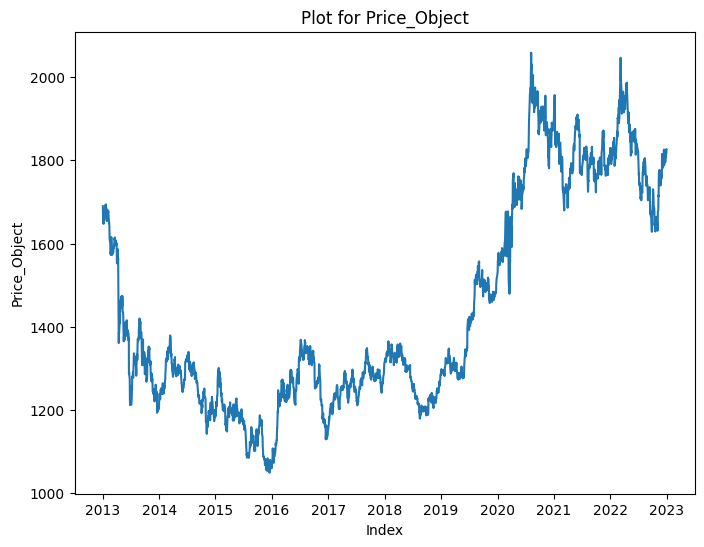

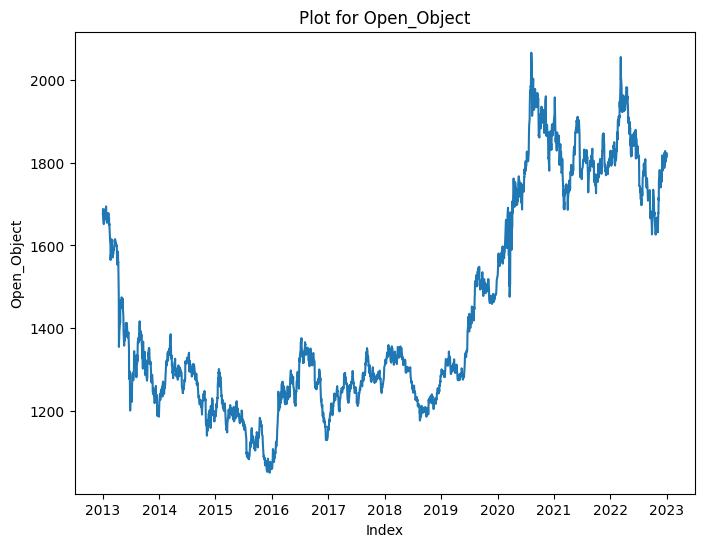

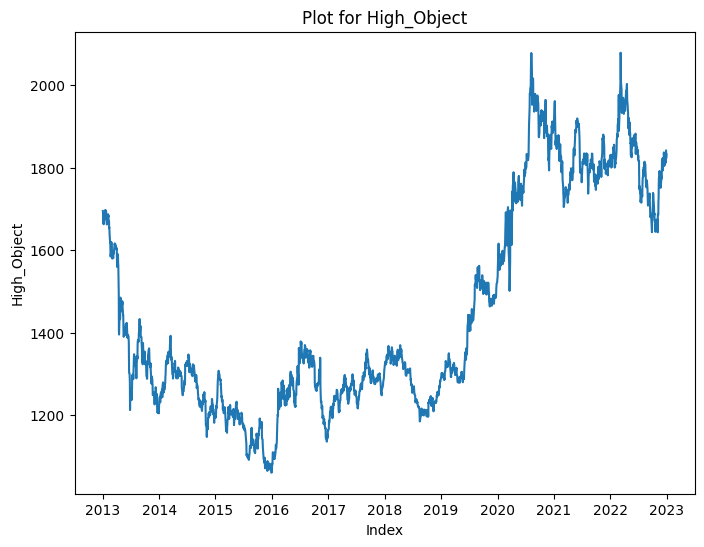

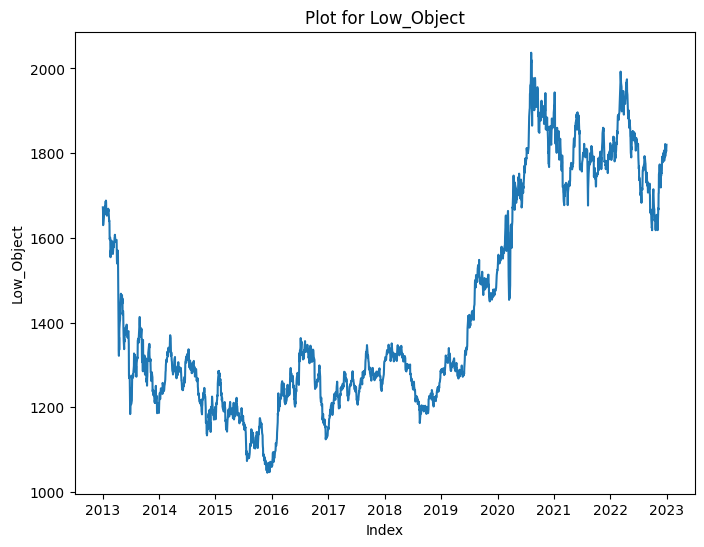

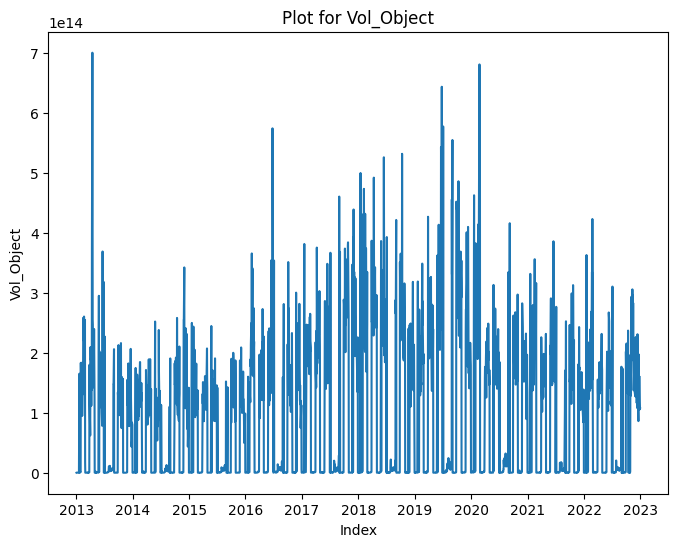

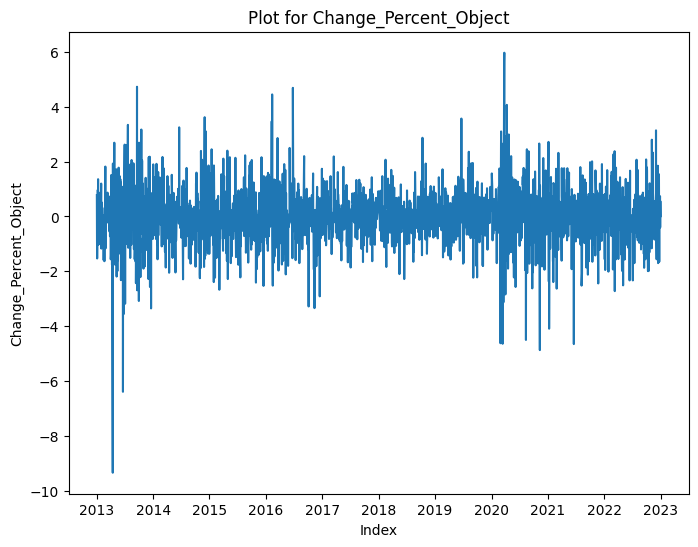

In [40]:
import matplotlib.pyplot as plt

# Iterasi melalui setiap kolom dalam DataFrame
for column in new_df.columns:
    # Membuat plot untuk setiap kolom
    plt.figure(figsize=(8, 6))
    plt.plot(new_df[column])
    plt.title(f'Plot for {column}')  # Menetapkan judul plot dengan nama kolom
    plt.xlabel('Index')  # Menetapkan label sumbu x
    plt.ylabel(column)  # Menetapkan label sumbu y
    plt.show()


In [52]:
date = df['date'].values
energy = new_df['Price_Object'].values

print(date.shape)
print(energy.shape)

(2583,)
(2583,)


In [53]:
from sklearn.model_selection import train_test_split

date_train, date_test, energy_train, energy_test = train_test_split(date, energy, test_size = 0.2, shuffle = False, random_state=123)

In [54]:
from sklearn.preprocessing import StandardScaler

energy_train = energy_train.reshape(-1, 1)
energy_test = energy_test.reshape(-1, 1)

# menghindari data leakage
scaler = StandardScaler()
scaler.fit_transform(energy_train)
scaler.transform(energy_test)

array([[-1.0195354 ],
       [-1.02719682],
       [-0.96772962],
       [-1.03668238],
       [-0.98779524],
       [-1.06732805],
       [-1.05091073],
       [-1.0443438 ],
       [-0.98524144],
       [-0.98961939],
       [-0.99071388],
       [-0.99144354],
       [-0.94255639],
       [-0.88856164],
       [-0.87725193],
       [-0.86338841],
       [-0.85390285],
       [-0.98925456],
       [-1.00567188],
       [-0.94255639],
       [-0.9389081 ],
       [-0.97283724],
       [-0.90461413],
       [-1.06003147],
       [-1.06003147],
       [-0.97976899],
       [-0.97976899],
       [-0.98451178],
       [-0.97794485],
       [-1.00311808],
       [-0.99180836],
       [-0.98013382],
       [-1.02975062],
       [-1.02208921],
       [-1.10964827],
       [-1.11840417],
       [-1.103811  ],
       [-1.11585037],
       [-1.07936742],
       [-1.17896585],
       [-1.16729131],
       [-1.08702884],
       [-1.07936742],
       [-1.0728005 ],
       [-0.97429655],
       [-0

In [55]:
import tensorflow as tf

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift = 1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))

    return ds.batch(batch_size).prefetch(1)

In [56]:
print(len(energy_train), len(energy_test))

2066 517


In [57]:
x_energy_train = windowed_dataset(energy_train, window_size=60, batch_size=100, shuffle_buffer=5000)
x_energy_test = windowed_dataset(energy_test, window_size=60, batch_size=100, shuffle_buffer=5000)

model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(128, return_sequences = True, input_shape=[None, 1]),
  tf.keras.layers.LSTM(256, return_sequences= True),
  tf.keras.layers.LSTM(128),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [58]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [59]:
threshold_mae = (new_df['Price_Object'].max() - new_df['Price_Object'].min()) * 10/100
print(threshold_mae)

100.88000000000002


In [64]:
# callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae') < threshold_mae) and (logs.get('val_mae') < threshold_mae):
      self.model.stop_training = True
      print("\nMAE < 10% dari skala data")
callbacks = myCallback()


#train
tf.keras.backend.set_floatx('float64')
history = model.fit(x_energy_train,
                    validation_data = x_energy_test,
                    epochs=50,
                    callbacks = [callbacks]
                    )

Epoch 1/50


21/21 [==============================] - 23s 1s/step - loss: 229.5809 - mae: 230.0564 - val_loss: 90.2538 - val_mae: 89.8086
Epoch 2/50
21/21 [==============================] - 24s 1s/step - loss: 229.0046 - mae: 229.5629 - val_loss: 88.9336 - val_mae: 90.3979
Epoch 3/50
21/21 [==============================] - 25s 1s/step - loss: 229.5393 - mae: 229.9247 - val_loss: 92.5690 - val_mae: 94.3402
Epoch 4/50
21/21 [==============================] - 25s 1s/step - loss: 228.9346 - mae: 229.5005 - val_loss: 88.1268 - val_mae: 88.7531
Epoch 5/50
21/21 [==============================] - 25s 1s/step - loss: 229.7584 - mae: 230.2068 - val_loss: 93.6190 - val_mae: 93.9889
Epoch 6/50
21/21 [==============================] - 25s 1s/step - loss: 229.4848 - mae: 230.1979 - val_loss: 89.7183 - val_mae: 89.4946
Epoch 7/50
21/21 [==============================] - 25s 1s/step - loss: 229.2335 - mae: 229.9713 - val_loss: 88.1926 - val_mae: 89.1223
Epoch 8/50
21/21 [==============================] - 25s 1s/

In [66]:
print("MAE terakhir: ", history.history['mae'][-1])
print("Val MAE terakhir: ", history.history['val_mae'][-1])

MAE terakhir:  229.35820065248845
Val MAE terakhir:  90.7964470302002
